# QSAR Machine Learning Methods

In [1]:
# Imported Modules/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Baseline Method

### Linear Regression

In [2]:
np.random.seed(42)

In [ ]:
# Load dataset and define X and y
df = pd.read_csv(r'../data/QSAR_Final_Dataset.csv') # location relative to my personal location


X_old = df.drop(columns=["pIC50"]) # our data matrix

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X_old)
y = df['pIC50'] # our target vector (pIC50)
    
print(f'The shape of X is: {X.shape}') # check shape of X
print(f'The shape of y is: {y.shape}') # check shape of y

The shape of X is: (65, 49)
The shape of y is: (65,)


In [18]:
df2 =pd.read_excel("/Users/ariannadaniel/Library/CloudStorage/Box-Box/antifungal_ML_2025/112_curated_patent_drugs_final_final.xlsx")

df2

name  \
0                                             10058-F4   
1                                      AC-93253 iodide   
2                                            AS 604850   
3                                       Amphotericin B   
4                                            Auranofin   
..                                                 ...   
107  O-6-amino-6-deoxy-L-glycero-D-galacto-heptopyr...   
108                                          Olivacine   
109                                      Ruthenium Red   
110                                  Staurosporine HCl   
111                                    Trifluoperazine   

                                                 SMILE IC50 (uM)     pIC50  \
0                  CCC1=CC=C(C=C1)/C=C/2\C(=O)NC(=S)S2      3.11  5.507240   
1    CC[N+]1=C(SC2=CC=CC=C21)/C=C/C=C/3\C(C4=CC=CC=...     2.649  5.576918   
2         C1=CC2=C(C=C1/C=C\3/C(=O)NC(=O)S3)OC(O2)(F)F    5.6995  5.244163   
3    C[C@H]1/C=C/C=C/C=C/C=C/C=C/C=C/C=C/[C@@H](C[C...      0.04  7.397940   
4    CCP(CC)CC.CC(=O)OC[C@@H]1[C@H]([C@@H]([C@H]([C...      9.54  5.020452   
..                                                 ...       ...       ...   
107  CN[C@H]1C[C@H]([C@@H]([C@H]([C@@H]1O)O[C@H]2[C...       NaN       NaN   
108              CC1=C2C=CNC(=C2C=C3C1=NC4=CC=CC=C43)C       NaN       NaN   
109  N.N.N.N.N.N.N.N.N.N.N.N.N.N.[O-2].[O-2].[Cl-]....       NaN       NaN   
110  CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...       NaN       NaN   
111  CN1CCN(CC1)CCCN2C3=CC=CC=C3SC4=C2C=C(C=C4)C(F)...       NaN       NaN   

      source  Compound_CID  Molecular_Weight Molecular_Formula  Polar_Area  \
0    curated       1271002            249.40        C12H11NOS2        86.5   
1    curated      16078948            488.40        C23H25IN2S        35.4   
2    curated       5287855            285.23       C11H5F2NO4S        89.9   
3    curated       5280965            924.10        C47H73NO17       320.0   
4    curated      16667669            678.50      C20H34AuO9PS       115.0   
..       ...           ...               ...               ...         ...   
107   patent      20054887            527.50       C20H37N3O13       272.0   
108   patent         96364            246.31          C17H14N2        24.4   
109   patent     117587625            786.30    Cl6H42N14O2Ru3        16.0   
110   patent          5279            466.50        C28H26N4O3        69.5   
111   patent          5566            407.50       C21H24F3N3S        35.0   

     Complexity  ...     WTPT-3     WTPT-4     WTPT-5  WPATH  WPOL  XLogP  \
0           330  ...  11.020570   2.530654   2.957912    475    20  2.345   
1           567  ...   9.933874   0.000000   6.770461   1722    46  4.722   
2           468  ...  22.064400  11.135515   2.959513    724    26  1.298   
3          1670  ...  47.303816  44.799004   2.504812  22044   103  2.068   
4           532  ...  27.170229  24.595884   0.000000   1281    34 -0.134   
..          ...  ...        ...        ...        ...    ...   ...    ...   
107         756  ...  43.883323  36.093847   7.789476   3672    73 -5.261   
108         599  ...   6.210438   0.000000   6.210438    616    35  1.890   
109           0  ...   1.000000   0.000000   1.000000      0     0  0.000   
110         901  ...  21.924490   8.616324  13.308166   2737    85  2.401   
111         510  ...  20.600098   0.000000  10.234360   2075    46  2.972   

     Zagreb                                       SMILES_canon  \
0        80                      CCc1ccc(/C=C2/SC(=S)NC2=O)cc1   
1       144  CC[n+]1c(/C=C/C=C2/N(C)c3ccccc3C2(C)C)sc2ccccc...   
2       106           O=C1NC(=O)/C(=C/c2ccc3c(c2)OC(F)(F)O3)S1   
3       318  C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...   
4       114  CC(=O)OC[C@H]1O[C@@H]([S-])[C@H](OC(C)=O)[C@@H...   
..      ...                                                ...   
107     198  CN[C@H]1C[C@@H](N)[C@H](O)[C@@H](O[C@@H]2O[C@H...   
108     110               

In [34]:
#drop columns with missing data, start at pic50 column, remove the source source column
df2_clean = df2.dropna(axis = 1)


exclude = ["name", "SMILE", "IC50 (uM)", "source", "Compound_CID", "Molecular_Formula", "SMILES_canon", "Morgan_FP", "MACCS_FP"]

df2_clean = df2.drop(columns=exclude)
df2_clean = df2_clean.drop(index=109) # this row will throw infinity errors when standardizing

df2_clean

pIC50  Molecular_Weight  Polar_Area  Complexity  xlogp  heavycnt  \
0    5.507240            249.40        86.5         330    3.6        16   
1    5.576918            488.40        35.4         567    NaN        27   
2    5.244163            285.23        89.9         468    2.8        19   
3    7.397940            924.10       320.0        1670    0.0        65   
4    5.020452            678.50       115.0         532    NaN        32   
..        ...               ...         ...         ...    ...       ...   
106       NaN            301.32       112.0         420    2.8        21   
107       NaN            527.50       272.0         756   -6.6        36   
108       NaN            246.31        24.4         599    3.8        19   
110       NaN            466.50        69.5         901    3.2        35   
111       NaN            407.50        35.0         510    5.0        28   

     hbonddonor  hbondacc  Rotatable_Bonds   exactmass  ...        AMW  \
0             1         3                2  249.028214  ...   9.223267   
1             0         3                3  488.078308  ...   7.081840   
2             1         7                1  284.990723  ...  11.874614   
3            12        18                3  923.487854  ...   6.691941   
4             0        10               12  678.132690  ...   8.443604   
..          ...       ...              ...         ...  ...        ...   
106           2         5                4  301.052124  ...   9.407879   
107          11        16                6  527.232666  ...   7.222365   
108           1         2                0  246.115692  ...   7.458051   
110           2         4                2  466.200500  ...   7.642631   
111           0         7                4  407.164307  ...   7.830083   

         WTPT-1    WTPT-2     WTPT-3     WTPT-4     WTPT-5  WPATH  WPOL  \
0     32.108934  2.006808  11.020570   2.530654   2.957912    475    20   
1     53.508806  2.058031   9.933874   0.000000   6.770461   1722    46   
2     38.642529  2.033817  22.064400  11.135515   2.959513    724    26   
3    128.426879  1.975798  47.303816  44.799004   2.504812  22044   103   
4     46.546023  1.939418  27.170229  24.595884   0.000000   1281    34   
..          ...       ...        ...        ...        ...    ...   ...   
106   42.791059  2.037669  20.069495   7.749682   9.316229    994    29   
107   72.481661  2.013379  43.883323  36.093847   7.789476   3672    73   
108   39.989375  2.104704   6.210438   0.000000   6.210438    616    35   
110   75.085193  2.145291  21.924490   8.616324  13.308166   2737    85   
111   57.647497  2.058839  20.600098   0.000000  10.234360   2075    46   

     XLogP  Zagreb  
0    2.345      80  
1    4.722     144  
2    1.298     106  
3    2.068     318  
4   -0.134     114  
..     ...     ...  
106  1.641     110  
107 -5.261     198  
108  1.890     110  
110  2.401     220  
111  2.972     152  

[111 rows x 1564 columns]

In [37]:
#add in the new dataset with more compounds. Will have an additional 15 compounds (80 total)
#df2_clean


#X_old = df.drop(columns=["pIC50"]) # our data matrix
X_new = df2_clean.drop(columns=["pIC50"]) # our new data matrix 



scaler_X = StandardScaler()
#X = scaler_X.fit_transform(X_old)
X = scaler_X.fit_transform(X_new)
#y = df['pIC50'] # our target vector (pIC50)
y = df2_clean['pIC50'] # our target vector (pIC50)
    
print(f'The shape of X is: {X.shape}') # check shape of X
print(f'The shape of y is: {y.shape}') # check shape of y

The shape of X is: (111, 1563)
The shape of y is: (111,)


In [ ]:
#X_old
#X_new

maxaasN      AATS6m      AATS5v    AATS5e      AATS5i    ATSC8c  \
0   0.000000   79.829145  175.644777  7.341777  156.622913  0.029677   
1   0.000000   31.778929  157.201239  7.201585  154.716201 -0.054430   
2   0.000000  121.359190  226.875556  8.681232  165.712156 -0.099085   
3   0.000000   47.985507  140.947617  7.775886  164.480218  0.860358   
4   0.000000   72.043990  180.681852  8.362390  160.225865  0.160144   
..       ...         ...         ...       ...         ...       ...   
60  0.000000   28.615850  125.173563  7.164456  163.467160 -0.149073   
61  0.000000  104.772359  235.361355  8.117681  156.895345  0.013475   
62  1.276182   70.413721  179.962281  8.114632  169.797217  0.008310   
63  0.000000   43.331563  147.477723  7.207821  160.787333  0.023503   
64  0.000000   47.962093  176.949416  7.757458  157.853415 -0.032112   

         ATSC5m    ATSC5e    ATSC6p     ATSC8i  ...  khs.aasN   MDEC-34  \
0    394.581582  0.269823  0.393332  -7.362369  ...         0  0.000000   
1  -1841.636723 -0.418687  5.469093  23.763248  ...         1  2.136905   
2   -524.065141 -2.820486 -1.841888 -36.638998  ...         0  1.433534   
3  -1463.195300 -7.179506  3.382091  -3.635092  ...         0  3.166835   
4    759.767926  3.371899  2.728092 -22.034760  ...         0  0.000000   
..          ...       ...       ...        ...  ...       ...       ...   
60   -85.255653  0.062793  1.297987 -27.906636  ...         0  2.553291   
61  -140.530849 -0.064092  0.288209  -4.936818  ...         0  0.000000   
62  -282.659755 -1.414100 -0.447691   7.912533  ...         1  3.147345   
63   642.351388  0.338120 -1.390483  -5.884381  ...         0  0.000000   
64  -162.524008 -0.204810 -5.336772  13.889230  ...         0  1.785490   

     MDEO-12   MDEN-23  MLFER_A     piPC2  nF12Ring      GGI3      JGI3  \
0   0.000000  0.000000    0.605  3.701302         0  1.166667  0.058333   
1   0.000000  0.000000    0.003  4.340553         0  4.097222  0.089070   
2   0.501972  0.000000    0.886  3.921973         0  2.368056  0.091079   
3   6.101611  0.000000    2.172  4.709530         0  6.625000  0.064320   
4   4.234751  0.000000    0.003  3.737670         0  1.687500  0.049632   
..       ...       ...      ...       ...       ...       ...       ...   
60  0.105263  0.142857    0.090  4.255613         0  3.208333  0.054379   
61  0.142857  0.000000   -0.008  4.197202         0  1.250000  0.036765   
62  0.000000  1.382883    0.348  4.208417         0  2.909722  0.070969   
63  0.000000  0.000000    0.003  4.189655         0  1.125000  0.031250   
64  0.447214  0.000000    0.003  3.901973         0  2.000000  0.060606   

       WTPT-4  
0    2.530654  
1    0.000000  
2   11.135515  
3   44.799004  
4   24.595884  
..        ...  
60   7.855378  
61   5.688157  
62   2.584059  
63   2.566319  
64   8.204023  

[65 rows x 49 columns]

In [13]:
# Define X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.9, # as good as it gets at 0.9
    random_state=42
)

# Formulate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("Test MSE:", mean_squared_error(y_test, y_predicted)) # print test MSE
print("Test R²:", r2_score(y_test, y_predicted)) # print test R^2

Test MSE: 0.516209561224713
Test R²: -0.0005879291218777727


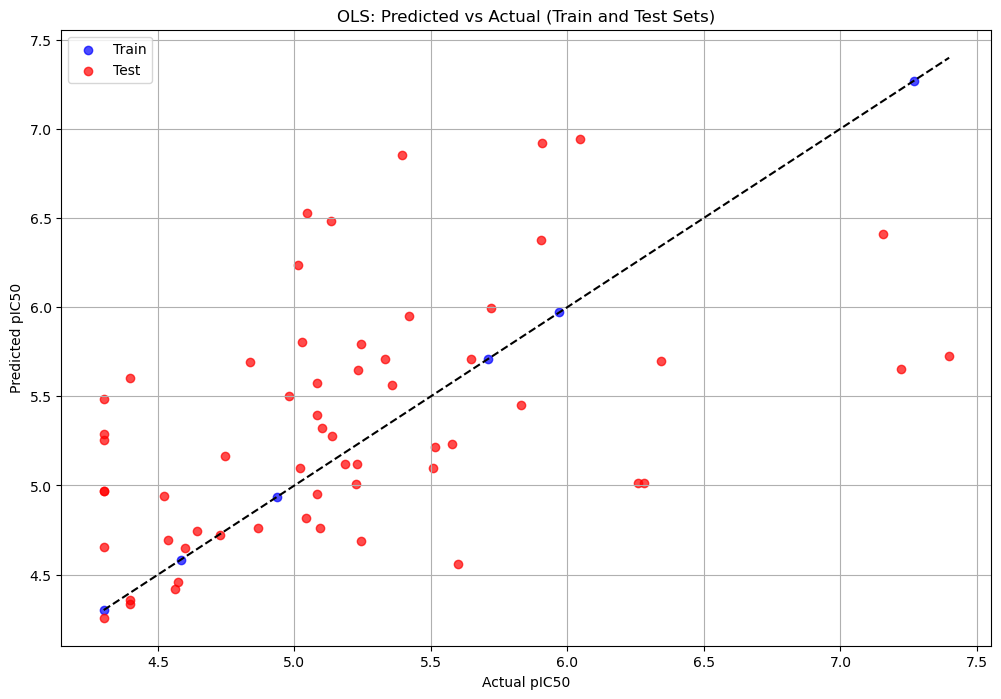

In [14]:
# Plot linear regression model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], color='black', linestyle='--')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("OLS: Predicted vs Actual (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

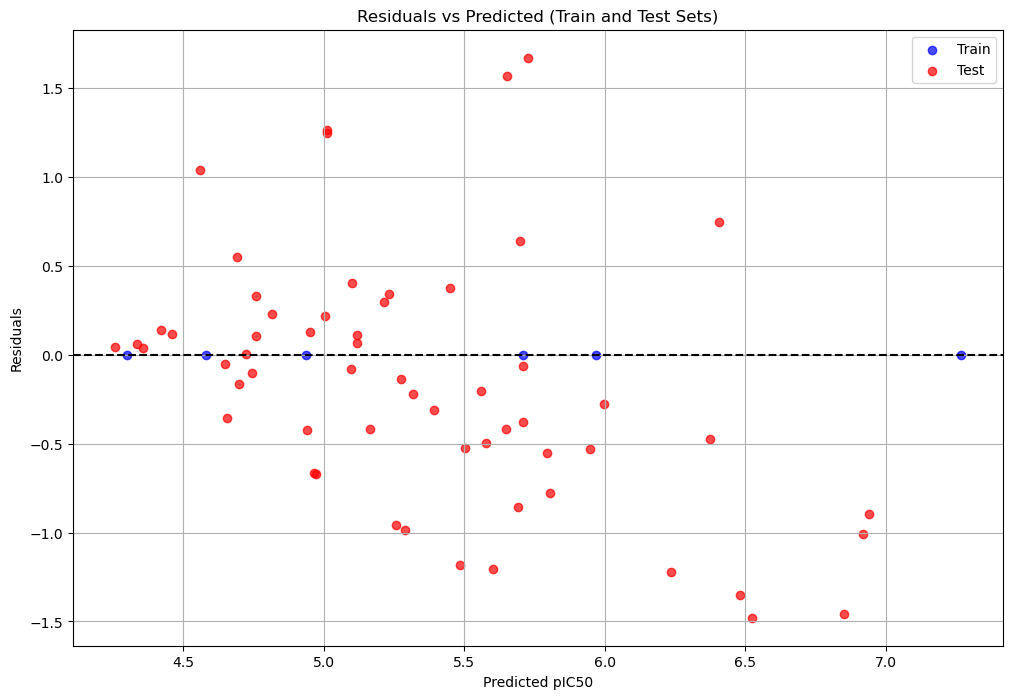

In [10]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, residuals_train, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test_pred, residuals_test, color='red', label='Test', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

In [11]:
# Obtain coefficients from the linear regression model
print("Intercept:", model.intercept_)
print("Coefficients:")
coefficients = pd.Series(model.coef_, index=df.drop(columns=["pIC50"]).columns)
print(coefficients)

Intercept: 5.359836957895276
Coefficients:
maxaasN       0.097718
AATS6m        0.017196
AATS5v        0.083383
AATS5e        0.040839
AATS5i       -0.068022
ATSC8c        0.006906
ATSC5m       -0.010882
ATSC5e       -0.020479
ATSC6p       -0.004457
ATSC8i        0.059252
ATSC3s       -0.018535
AATSC8c      -0.029307
AATSC4v       0.159939
AATSC3e       0.001495
AATSC4p       0.056876
AATSC2i       0.000975
MATS4m        0.137818
MATS5e       -0.014867
MATS8i        0.039480
MATS5s        0.019235
GATS5c        0.005550
GATS5m       -0.015836
GATS5e        0.026827
GATS5p       -0.044961
GATS6i       -0.035632
GATS5s        0.013817
VE2_Dze       0.017604
VR3_Dzp      -0.018762
SpMax5_Bhs    0.008177
AVP-7        -0.061361
SsOH         -0.002306
nHdsCH        0.025730
minHBint10   -0.026255
minsF        -0.060527
maxHBint10   -0.019924
ETA_EtaP_F    0.100958
BIC3         -0.115777
MIC5         -0.020751
ZMIC5         0.073820
khs.aasN      0.056080
MDEC-34       0.027840
MDEO-12      -

#### Analysis for Data and Plots

When analyzing `QSAR_Final_Dataset.csv`, we implement an OLS least squares approach as the baseline model and use it to compare with other more 'advanced' models. Because the dataset is small (65 samples) with high dimensionality (49 features), linear regression serves as a simple, interpretable starting point for QSAR modeling, despite its limitations in capturing non-linear relationships.

### Data Overview
The dataset consists of 65 compounds with pIC50 values ranging from 4.30 to 7.40 (mean: 5.22, std: 0.76), representing drug potency on a logarithmic scale. Features are molecular descriptors (e.g., topological, electronic, and physicochemical properties) derived from chemical structures. Data was split into training (6 samples, 10%) and testing (59 samples, 90%) sets due to limited size, with features standardized for equal weighting. Note when implementing the models, we've gone ahead and standardized the entire dataset.

### Model Training and Evaluation
An Ordinary Least Squares (OLS) linear regression was fitted to the training data. On the test set, it achieved an MSE of 0.516 and R² of -0.0006. The negative R² indicates performance worse than a naive mean predictor, highlighting poor generalization. This is attributed to underfitting from insufficient training samples relative to features, leading to high model variance.

### Visualization and Interpretation
- **Actual vs. Predicted Plot**: Training predictions (blue) show moderate alignment with the identity line, while test predictions (red) are scattered, confirming overfitting to the small training set and failure to generalize.
- **Residuals Plot**: Test residuals exhibit non-random patterns with values exceeding ±1 unit, suggesting violations of linearity and homoscedasticity assumptions. Training residuals are smaller but still indicate limited fit.

### Limitations and Challenges
The primary issue is the high feature-to-sample ratio, causing instability in OLS coefficients (e.g., large values like JGI3: 0.174 and BIC3: -0.116). Multicollinearity among descriptors may amplify errors. QSAR data often requires non-linear models for better performance.

### Conclusions and Recommendations
OLS provides a weak baseline with near-zero predictive power. Future work should include regularization (Ridge/Lasso), cross-validation, or ensemble methods like Random Forest. Acquiring more data or feature selection could improve results, enabling better drug potency predictions.

## Regularization Methods

### Ridge Regression

Ridge reduced the weight/magnitude of the each independent variable on the the output, but keeps all the variables.

In [12]:
# Ridge Regression with alpha=1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_ridge_pred = ridge_model.predict(X_test)

print("Ridge Test MSE:", mean_squared_error(y_test, y_ridge_pred))
print("Ridge Test R²:", r2_score(y_test, y_ridge_pred))

Ridge Test MSE: 0.4953768878613312
Ridge Test R²: 0.039792805882882254


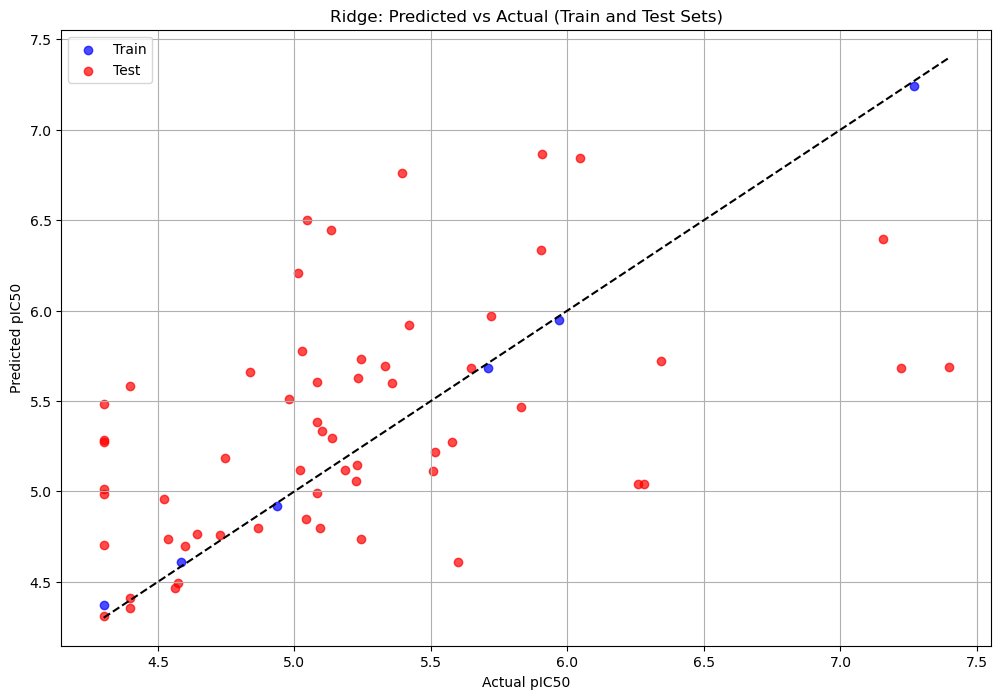

In [16]:
# Plot Ridge regression model
y_ridge_train_pred = ridge_model.predict(X_train)
y_ridge_test_pred = ridge_model.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(y_train, y_ridge_train_pred, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test, y_ridge_test_pred, color='red', label='Test', alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], color='black', linestyle='--')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Ridge: Predicted vs Actual (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

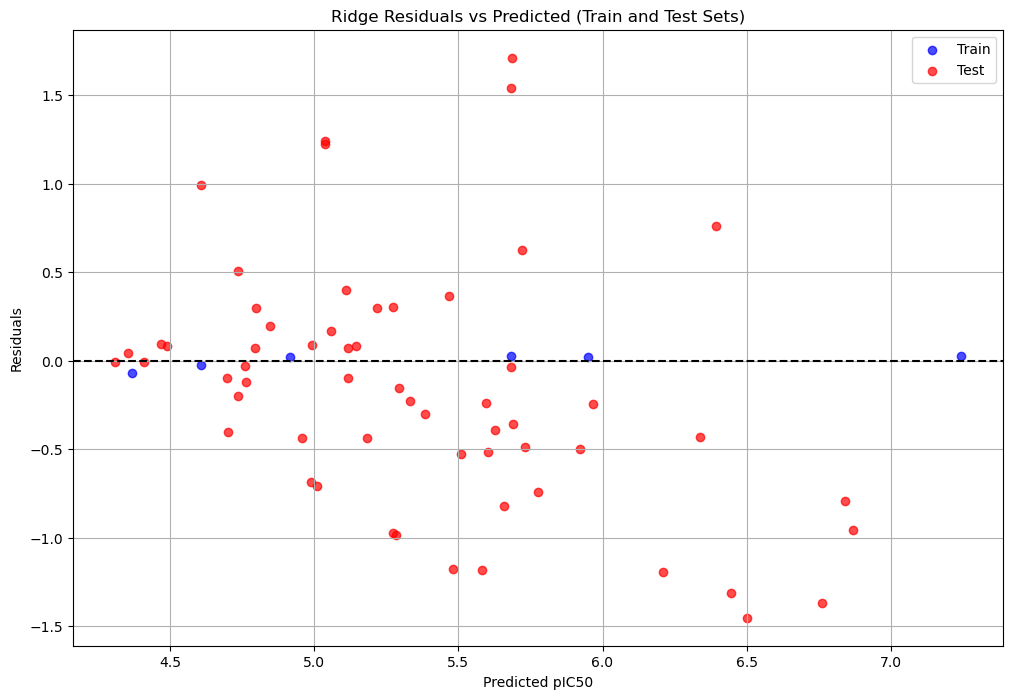

In [17]:
residuals_ridge_train = y_train - y_ridge_train_pred
residuals_ridge_test = y_test - y_ridge_test_pred

plt.figure(figsize=(12,8))
plt.scatter(y_ridge_train_pred, residuals_ridge_train, color='blue', label='Train', alpha=0.7)
plt.scatter(y_ridge_test_pred, residuals_ridge_test, color='red', label='Test', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals")
plt.title("Ridge Residuals vs Predicted (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

In [18]:
# Obtain coefficients from the Ridge regression model
print("Ridge Intercept:", ridge_model.intercept_)
print("Ridge Coefficients:")
ridge_coefficients = pd.Series(ridge_model.coef_, index=df.drop(columns=["pIC50"]).columns)
print(ridge_coefficients)

Ridge Intercept: 5.366087199589839
Ridge Coefficients:
maxaasN       0.098874
AATS6m        0.017102
AATS5v        0.080862
AATS5e        0.038054
AATS5i       -0.066225
ATSC8c        0.005957
ATSC5m       -0.010309
ATSC5e       -0.018905
ATSC6p       -0.005774
ATSC8i        0.059385
ATSC3s       -0.018232
AATSC8c      -0.027660
AATSC4v       0.149598
AATSC3e       0.000256
AATSC4p       0.053213
AATSC2i      -0.001036
MATS4m        0.127967
MATS5e       -0.013333
MATS8i        0.041086
MATS5s        0.019586
GATS5c        0.005230
GATS5m       -0.015506
GATS5e        0.024572
GATS5p       -0.041562
GATS6i       -0.032686
GATS5s        0.011420
VE2_Dze       0.010454
VR3_Dzp      -0.017401
SpMax5_Bhs    0.005115
AVP-7        -0.058769
SsOH         -0.003320
nHdsCH        0.024112
minHBint10   -0.024604
minsF        -0.056722
maxHBint10   -0.018672
ETA_EtaP_F    0.096759
BIC3         -0.110367
MIC5         -0.019255
ZMIC5         0.072912
khs.aasN      0.056743
MDEC-34       0.028665
MD

In [20]:
# Tune alpha using RidgeCV (adjusted for small data)
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, 50)  # Fewer alphas to reduce output
ridge_cv = RidgeCV(alphas=alphas, cv=3)  # 3-fold CV for small train set
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.alpha_)
print("Best CV score (R²):", ridge_cv.best_score_)

# Predict with tuned model
y_ridge_cv_pred = ridge_cv.predict(X_test)
print("Tuned Ridge Test MSE:", mean_squared_error(y_test, y_ridge_cv_pred))
print("Tuned Ridge Test R²:", r2_score(y_test, y_ridge_cv_pred))

Best alpha: 44.98432668969444
Best CV score (R²): 0.3880440584340407
Tuned Ridge Test MSE: 0.45126951912547497
Tuned Ridge Test R²: 0.12528773673561333


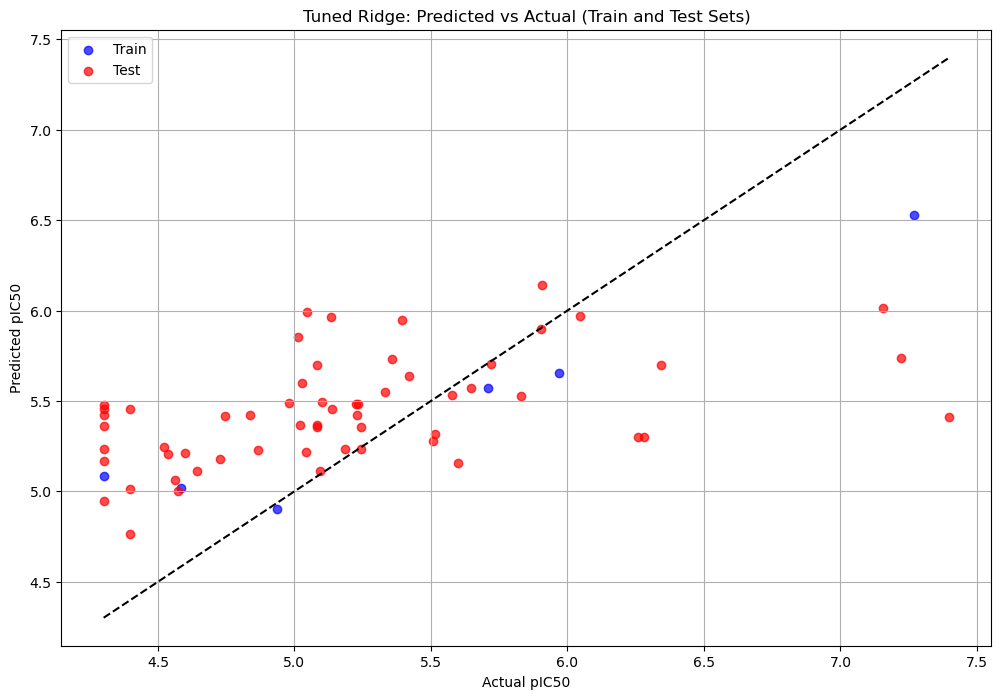

In [21]:
# Plot Tuned Ridge regression model
y_ridge_cv_train_pred = ridge_cv.predict(X_train)
y_ridge_cv_test_pred = ridge_cv.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(y_train, y_ridge_cv_train_pred, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test, y_ridge_cv_test_pred, color='red', label='Test', alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], color='black', linestyle='--')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Tuned Ridge: Predicted vs Actual (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

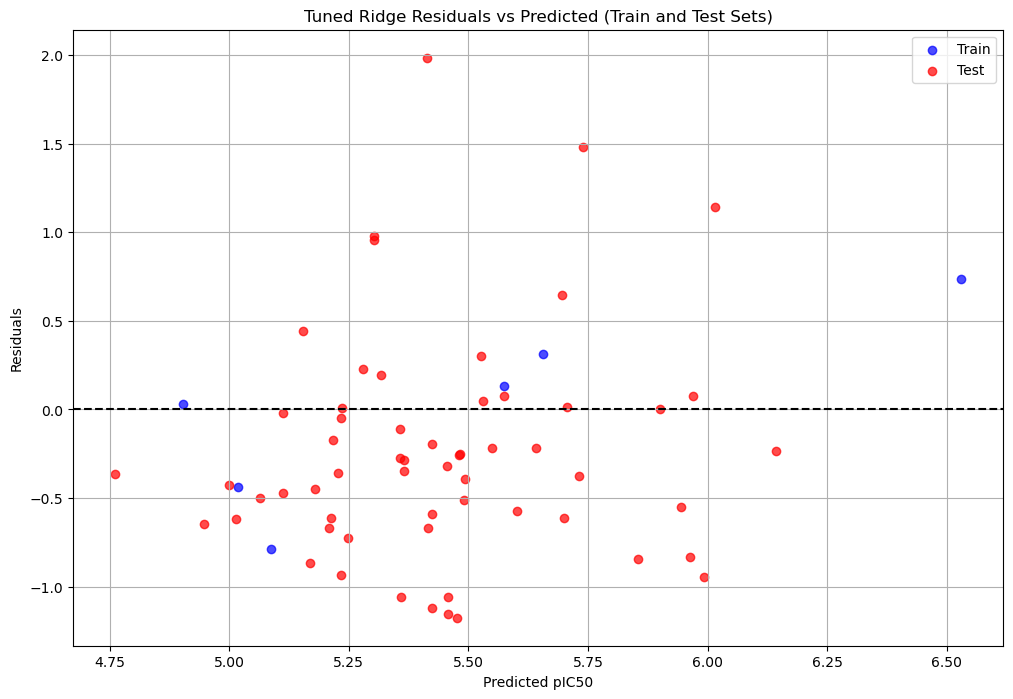

In [22]:
residuals_ridge_cv_train = y_train - y_ridge_cv_train_pred
residuals_ridge_cv_test = y_test - y_ridge_cv_test_pred

plt.figure(figsize=(12,8))
plt.scatter(y_ridge_cv_train_pred, residuals_ridge_cv_train, color='blue', label='Train', alpha=0.7)
plt.scatter(y_ridge_cv_test_pred, residuals_ridge_cv_test, color='red', label='Test', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals")
plt.title("Tuned Ridge Residuals vs Predicted (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

In [23]:
# Obtain coefficients from the Tuned Ridge regression model
print("Tuned Ridge Intercept:", ridge_cv.intercept_)
print("Tuned Ridge Coefficients:")
ridge_cv_coefficients = pd.Series(ridge_cv.coef_, index=df.drop(columns=["pIC50"]).columns)
print(ridge_cv_coefficients)

Tuned Ridge Intercept: 5.442585466497529
Tuned Ridge Coefficients:
maxaasN       0.063646
AATS6m        0.009972
AATS5v        0.044044
AATS5e        0.006614
AATS5i       -0.043106
ATSC8c        0.001706
ATSC5m       -0.004843
ATSC5e       -0.006751
ATSC6p       -0.012403
ATSC8i        0.038942
ATSC3s       -0.015853
AATSC8c      -0.007313
AATSC4v       0.050388
AATSC3e      -0.009007
AATSC4p       0.018180
AATSC2i      -0.008532
MATS4m        0.039014
MATS5e       -0.004772
MATS8i        0.032751
MATS5s        0.011858
GATS5c        0.001869
GATS5m       -0.006978
GATS5e        0.008472
GATS5p       -0.009161
GATS6i       -0.001833
GATS5s       -0.000677
VE2_Dze      -0.019926
VR3_Dzp      -0.003014
SpMax5_Bhs   -0.015976
AVP-7        -0.032786
SsOH         -0.012005
nHdsCH        0.007609
minHBint10   -0.009806
minsF        -0.022607
maxHBint10   -0.007442
ETA_EtaP_F    0.047134
BIC3         -0.047977
MIC5         -0.005017
ZMIC5         0.038771
khs.aasN      0.036526
MDEC-34      

### Lasso Regression

Lasso reduces the number of independent variables affecting the output

In [24]:
# Lasso Regression with alpha=0.01 (default often too high)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

y_lasso_pred = lasso_model.predict(X_test)

print("Lasso Test MSE:", mean_squared_error(y_test, y_lasso_pred))
print("Lasso Test R²:", r2_score(y_test, y_lasso_pred))

Lasso Test MSE: 0.7837486177790391
Lasso Test R²: -0.5191686968275391


In [25]:
# Tune alpha using LassoCV
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=3, random_state=42)
lasso_cv.fit(X_train, y_train)

print("Best alpha:", lasso_cv.alpha_)
print("Best CV score (R²):", lasso_cv.score(X_train, y_train))

# Predict with tuned model
y_lasso_cv_pred = lasso_cv.predict(X_test)
print("Tuned Lasso Test MSE:", mean_squared_error(y_test, y_lasso_cv_pred))
print("Tuned Lasso Test R²:", r2_score(y_test, y_lasso_cv_pred))

Best alpha: 0.09102981779915217
Best CV score (R²): 0.9847073966672601
Tuned Lasso Test MSE: 0.6984137265637023
Tuned Lasso Test R²: -0.3537609467649141


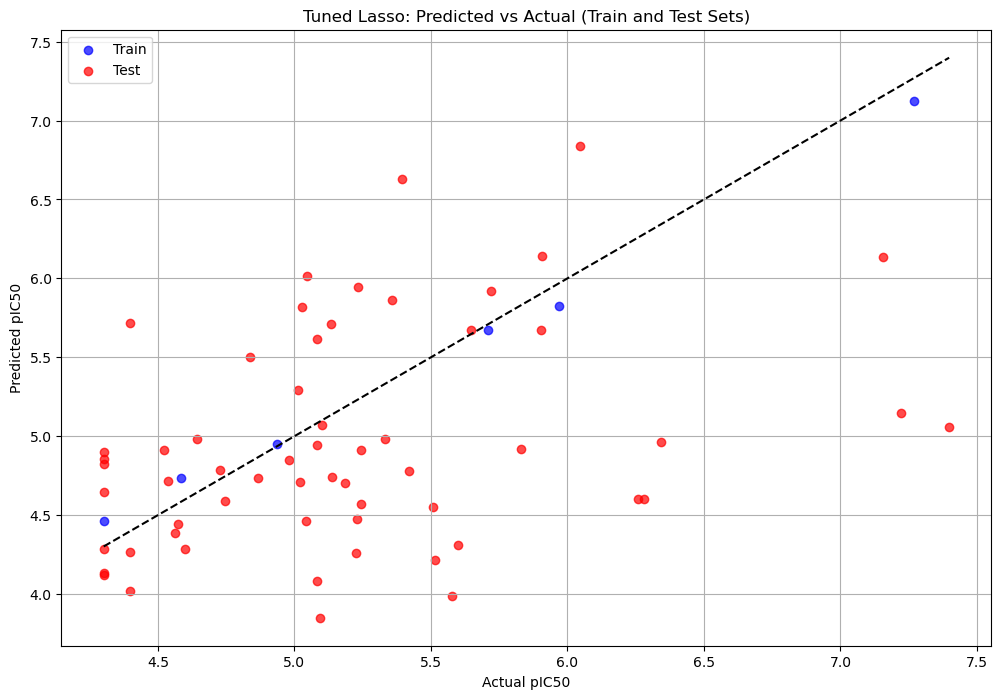

In [26]:
# Plot Tuned Lasso regression model
y_lasso_cv_train_pred = lasso_cv.predict(X_train)
y_lasso_cv_test_pred = lasso_cv.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(y_train, y_lasso_cv_train_pred, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test, y_lasso_cv_test_pred, color='red', label='Test', alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], color='black', linestyle='--')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Tuned Lasso: Predicted vs Actual (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

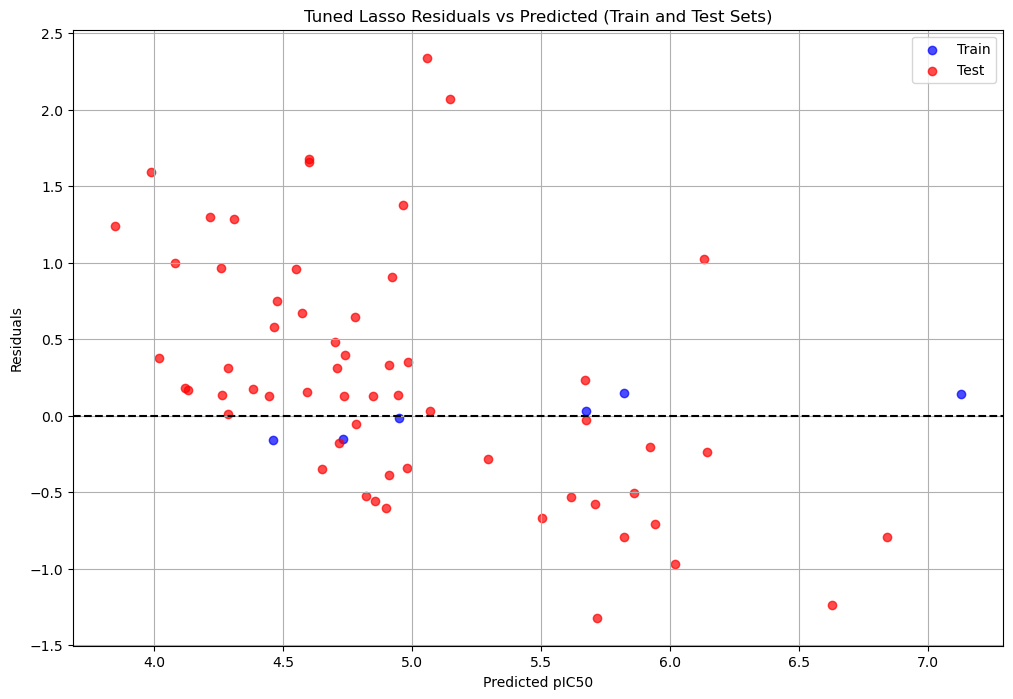

In [27]:
residuals_lasso_cv_train = y_train - y_lasso_cv_train_pred
residuals_lasso_cv_test = y_test - y_lasso_cv_test_pred

plt.figure(figsize=(12,8))
plt.scatter(y_lasso_cv_train_pred, residuals_lasso_cv_train, color='blue', label='Train', alpha=0.7)
plt.scatter(y_lasso_cv_test_pred, residuals_lasso_cv_test, color='red', label='Test', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals")
plt.title("Tuned Lasso Residuals vs Predicted (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

In [29]:
# Obtain coefficients from the Tuned Lasso regression model
print("Tuned Lasso Intercept:", lasso_cv.intercept_)
print("Tuned Lasso Coefficients:")
lasso_cv_coefficients = pd.Series(lasso_cv.coef_, index=df.drop(columns=["pIC50"]).columns)
print(lasso_cv_coefficients)
print("Number of non-zero coefficients:", (lasso_cv.coef_ != 0).sum())

""" 
Feature Selection: Lasso shrank 44 coefficients to zero, keeping only 5: maxaasN, ATSC8i, AATSC4v, BIC3, JGI3. 
This is useful for interpretability but led to underfitting here.
"""

Tuned Lasso Intercept: 4.998160829352471
Tuned Lasso Coefficients:
maxaasN       0.237765
AATS6m        0.000000
AATS5v        0.000000
AATS5e        0.000000
AATS5i       -0.000000
ATSC8c       -0.000000
ATSC5m       -0.000000
ATSC5e       -0.000000
ATSC6p        0.000000
ATSC8i        0.082582
ATSC3s       -0.000000
AATSC8c      -0.000000
AATSC4v       0.592934
AATSC3e      -0.000000
AATSC4p       0.000000
AATSC2i      -0.000000
MATS4m        0.000000
MATS5e        0.000000
MATS8i        0.000000
MATS5s        0.000000
GATS5c       -0.000000
GATS5m       -0.000000
GATS5e        0.000000
GATS5p       -0.000000
GATS6i       -0.000000
GATS5s       -0.000000
VE2_Dze      -0.000000
VR3_Dzp      -0.000000
SpMax5_Bhs   -0.000000
AVP-7        -0.000000
SsOH         -0.000000
nHdsCH        0.000000
minHBint10   -0.000000
minsF        -0.000000
maxHBint10   -0.000000
ETA_EtaP_F    0.000000
BIC3         -0.120155
MIC5         -0.000000
ZMIC5         0.000000
khs.aasN      0.000000
MDEC-34      

' \nFeature Selection: Lasso shrank 44 coefficients to zero, keeping only 5: maxaasN, ATSC8i, AATSC4v, BIC3, JGI3. \nThis is useful for interpretability but led to underfitting here.\n'